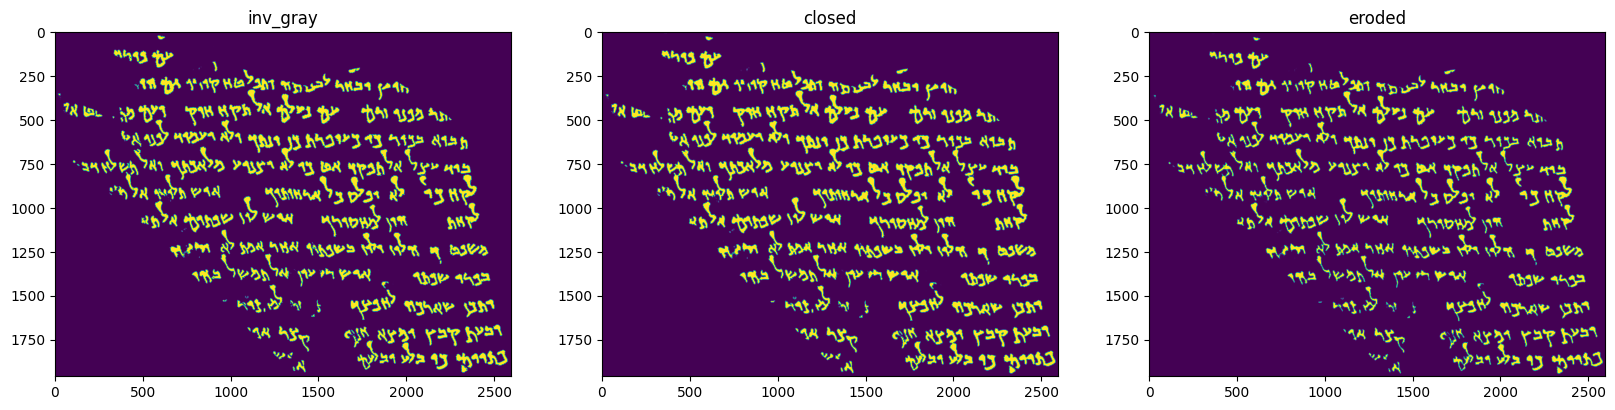

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from data_management.augmentation.commonAug import whitespaceRemover

gray_img = cv2.imread('image-data\P123-Fg001-R-C01-R01-binarized.jpg', cv2.IMREAD_GRAYSCALE)

#drawing_img = image.copy()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,12))



gray_img = whitespaceRemover(img=gray_img, padding=20)

inv_gray_img = cv2.bitwise_not(gray_img)

#blurred = cv2.GaussianBlur(gray_img, (11, 11), 0)


#_, thresholded = cv2.threshold(blurred, 0, 200, cv2.THRESH_OTSU)
#thresholded = cv2.bitwise_not(thresholded)


ax1.imshow(inv_gray_img)
ax1.set_title("inv_gray")


kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
morph = cv2.morphologyEx(inv_gray_img, cv2.MORPH_CLOSE, kernel_close, iterations=5)


ax2.imshow(morph)
ax2.set_title("closed")

# erode 
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
morph = cv2.morphologyEx(morph, cv2.MORPH_ERODE, kernel, iterations=3)

#morph = cv2.GaussianBlur(morph, (5, 5), 0)

#morph = cv2.morphologyEx(morph, cv2.MORPH_ERODE, kernel, iterations=3)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,3))
morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel_close, iterations=2)


ax3.imshow(morph)
ax3.set_title("eroded")

_, thresholded = cv2.threshold(morph, 0, 255, cv2.THRESH_OTSU)


#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
#thresholded = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)


#ax3.imshow(thresholded)
#ax3.set_title("inv_gray")
plt.show()

5.494394063949585


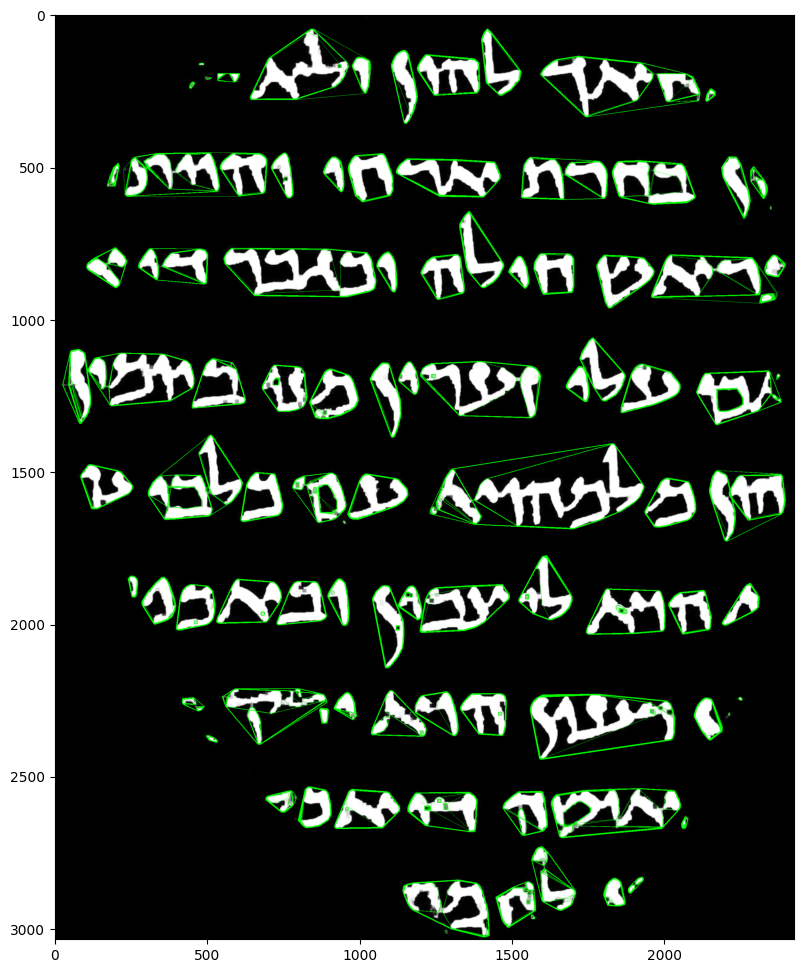

In [28]:
import cv2
from data_management.augmentation.commonAug import whitespaceRemover
import time

img = cv2.imread('image-data\P632-Fg002-R-C01-R01-binarized.jpg', cv2.IMREAD_GRAYSCALE)
img = whitespaceRemover(img=img, padding=20)
img = inv_gray_img.copy()


kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_close, iterations=5)


startTime = time.time()

mser = cv2.MSER_create()
mser.setMaxArea(200000)
#mser.setMinArea(1000)

#Resize the image so that MSER can work better
img = cv2.resize(img, (img.shape[1]*2, img.shape[0]*2))


vis = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2RGB)

regions = mser.detectRegions(img)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]

cv2.polylines(vis, hulls, 1, (0,255,0)) 

endTime = time.time()
print(endTime - startTime)


plt.figure(figsize=(20,12))
plt.imshow(vis)
plt.show()

cv2.namedWindow('img')
cv2.imshow('img', vis)
while(cv2.waitKey()!=ord('q')):
    continue
cv2.destroyAllWindows()


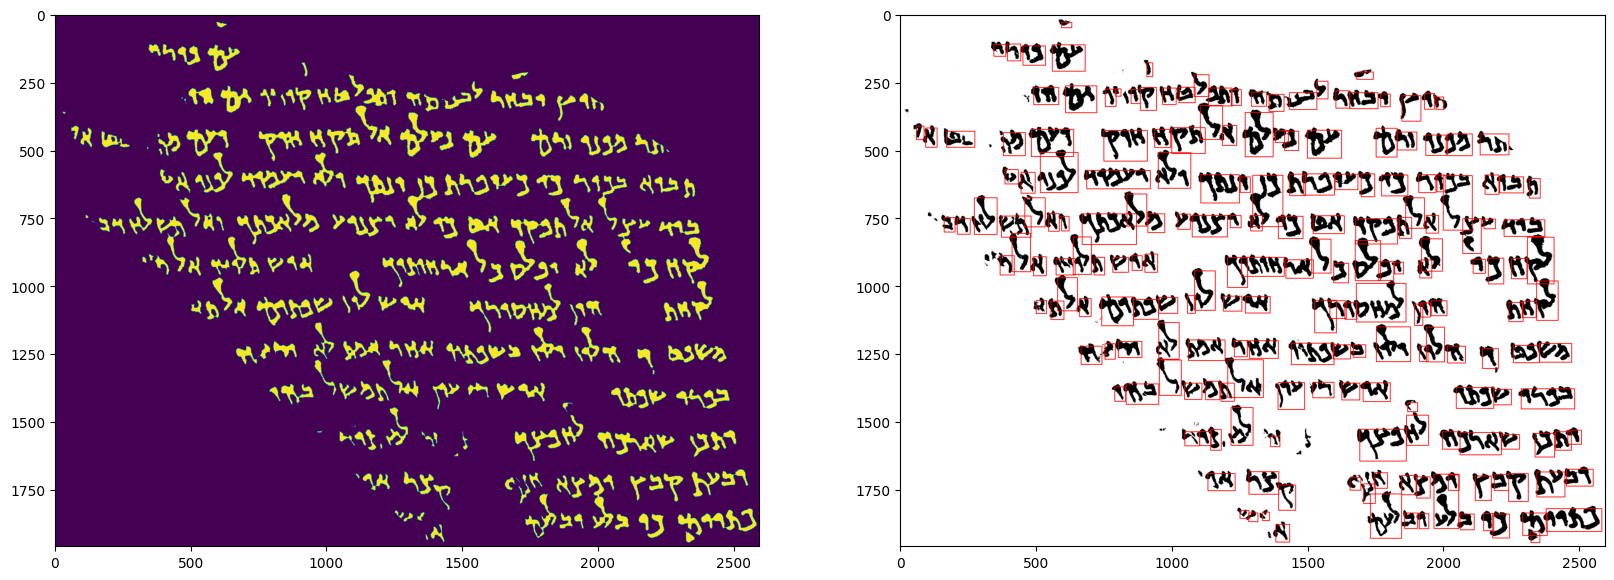

In [40]:
morph = thresholded.copy()


drawing_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)

ret, labels = cv2.connectedComponents(morph)

#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
#morph = cv2.morphologyEx(morph, cv2.MORPH_DILATE, kernel, iterations=2)

contours, hierarchy = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for label in range(1, ret):
    component = np.uint8(labels == label) * 255
    #component = cv2.bitwise_and(labels, label)

    
    #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    #component =  cv2.dilate(component, (5,5), iterations=3)

    # filter out small or invalid bounding boxes
    for j, contour in enumerate(contours):
            (x, y, w, h) = cv2.boundingRect(contour)
            # these are artifacts
            if (w < 20 or h < 20):
                continue

            drawing_img = cv2.rectangle(drawing_img, (x,y), (x+w, y+h), color = (255,0,0), thickness=2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,12))

ax1.imshow(thresholded)
ax2.imshow(drawing_img)

plt.show()

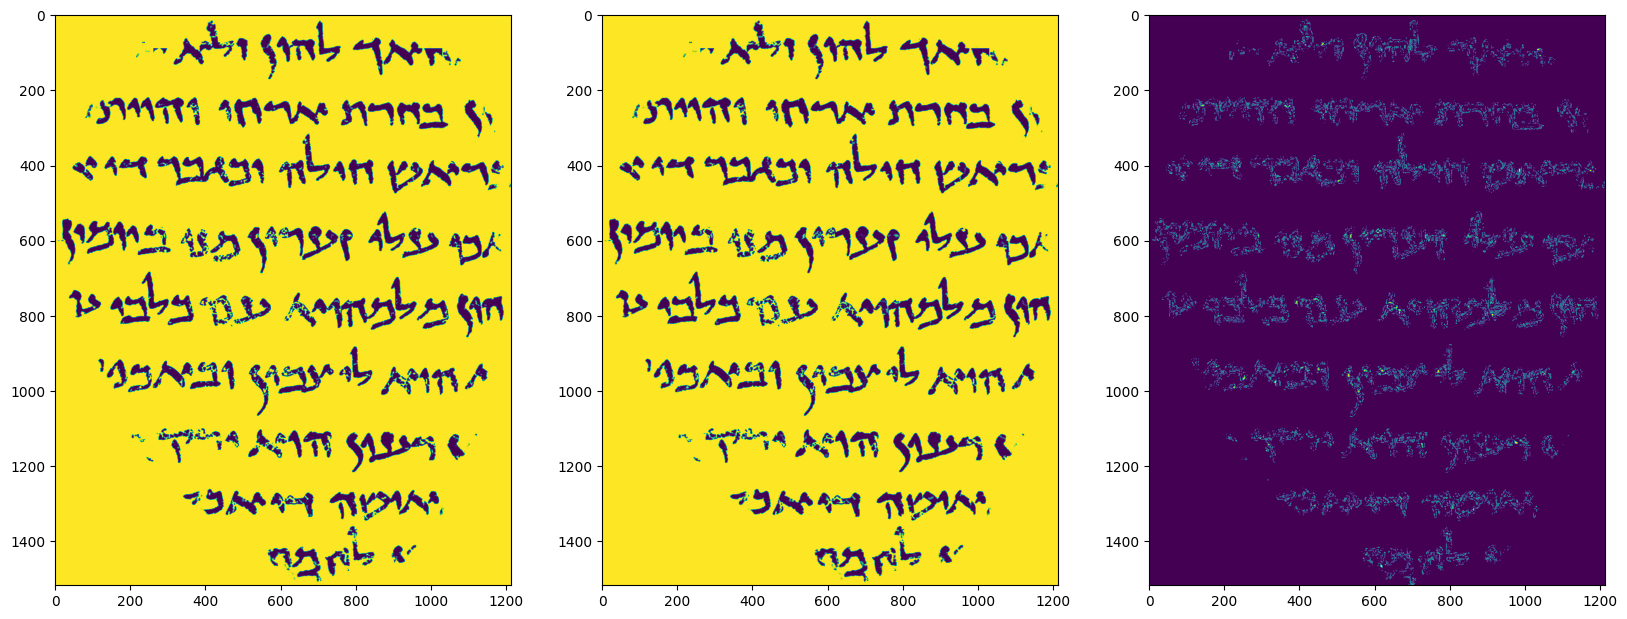

In [4]:
from skimage.morphology import reconstruction, area_opening


gray = gray_img.copy()
#_, gray = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

bw_small_opened = area_opening(gray, 50, connectivity=500)
#bw_small_opened = area_opening(bw_small_opened, 50, connectivity=5)
#bw_small_opened = area_opening(bw_small_opened, 50, connectivity=5)



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,30))

ax1.imshow(gray)
ax2.imshow(bw_small_opened)
ax3.imshow(bw_small_opened - gray)
plt.show()

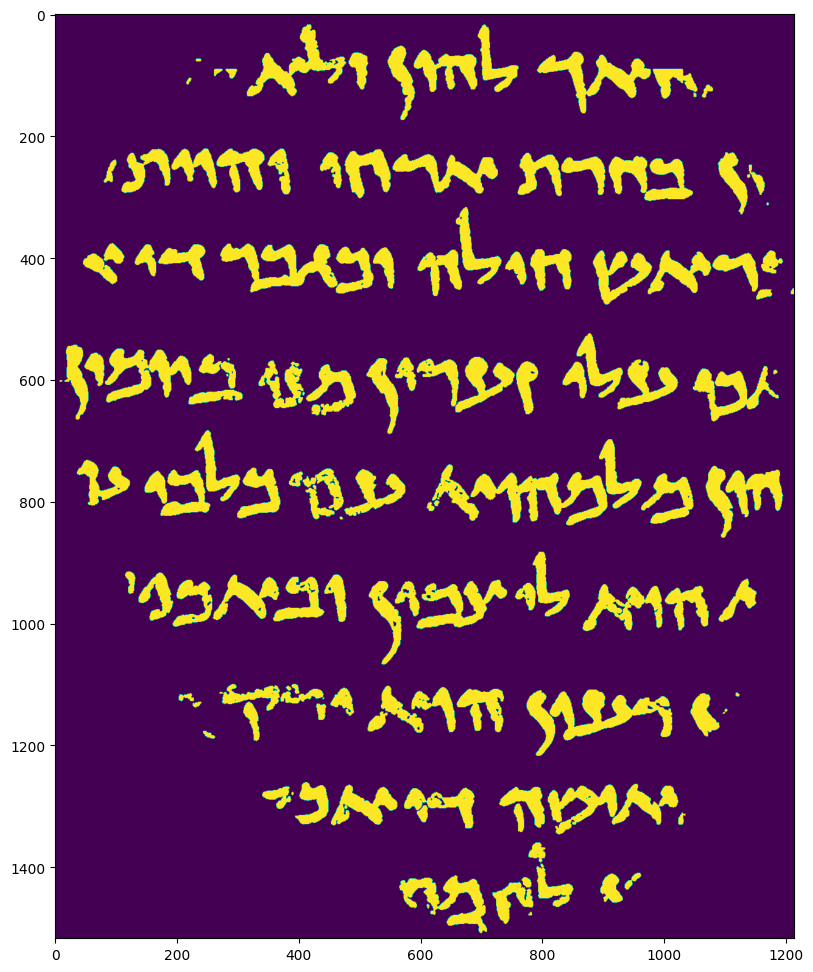

In [36]:
from skimage import morphology

im = inv_gray_img.copy()

im = cv2.GaussianBlur(im, (5, 5), 0)


bw_low = im > (im.mean())
bw_high = im > (im.mean() + im.std()/2)
bw_hist = morphology.reconstruction(bw_high, bw_low)

bw_hist = np.array(bw_hist, np.uint8)

# erode 
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
#bw_hist = cv2.morphologyEx(bw_hist, cv2.MORPH_ERODE, kernel, iterations=4)

plt.figure(figsize=(20,12))
plt.imshow(bw_hist)
plt.show()

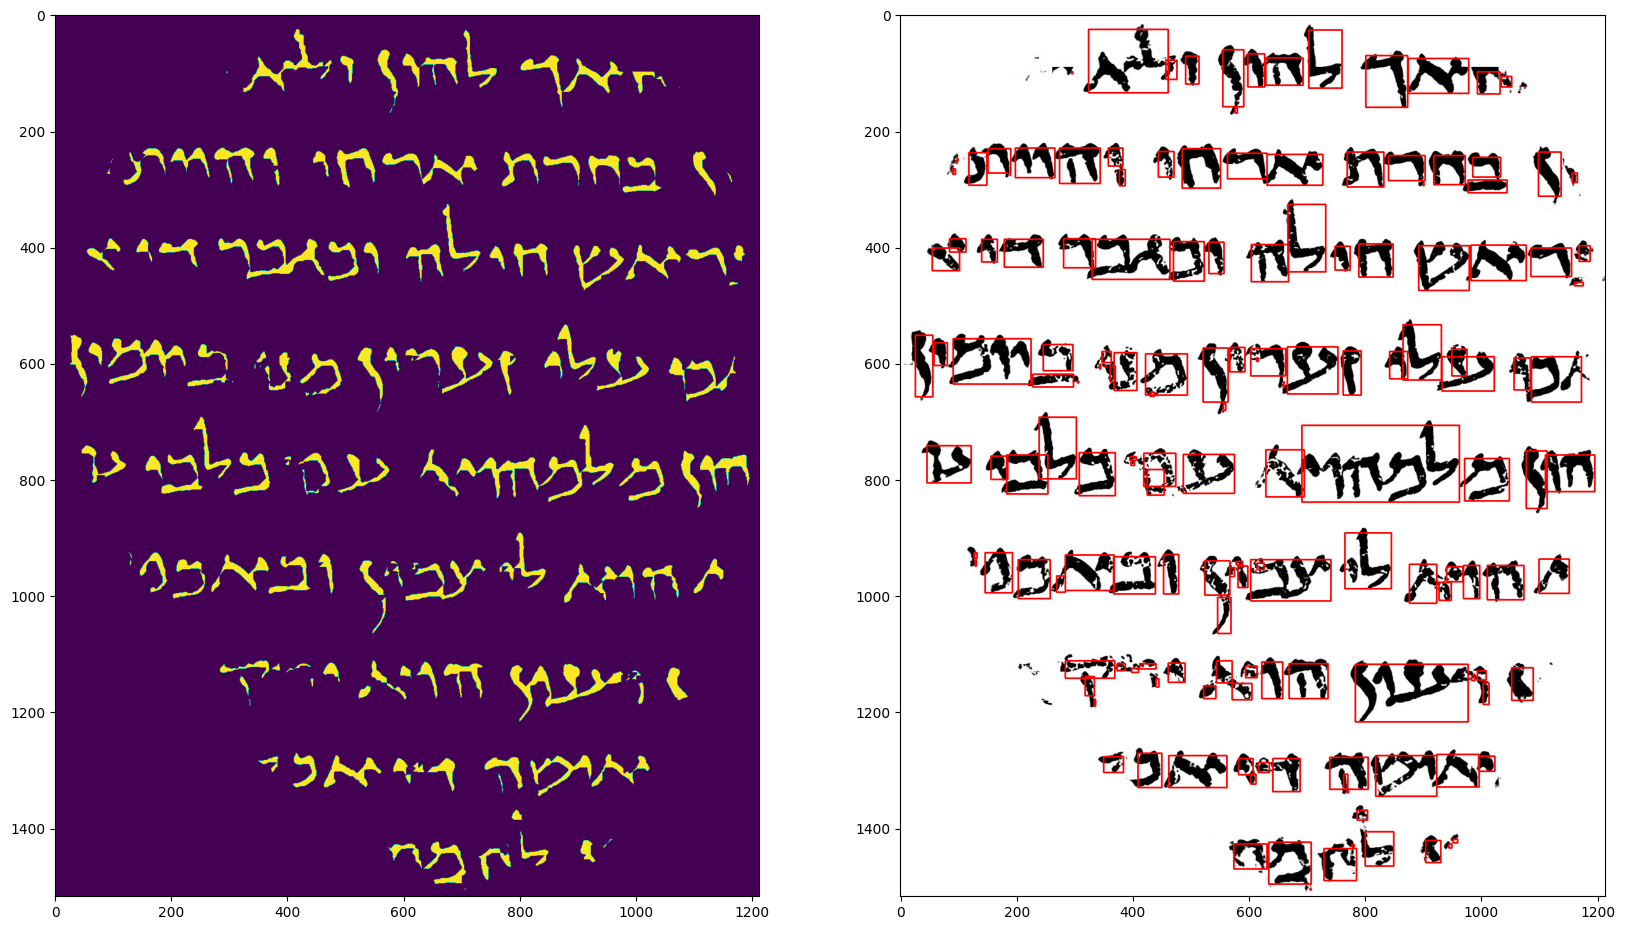

In [25]:
morph = bw_hist.copy()


drawing_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)

ret, labels = cv2.connectedComponents(thresholded)

#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
#morph = cv2.morphologyEx(morph, cv2.MORPH_DILATE, kernel, iterations=2)

contours, hierarchy = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


for label in range(1, ret):
    component = np.uint8(labels == label) * 255
    #component = cv2.bitwise_and(labels, label)

    
    #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    #component =  cv2.dilate(component, (5,5), iterations=3)

    # filter out small or invalid bounding boxes
    for j, contour in enumerate(contours):
            (x, y, w, h) = cv2.boundingRect(contour)
            # these are artifacts
            #if (w < 20 or h < 20):
            #    continue

            #w += 20
            #h += 20

            drawing_img = cv2.rectangle(drawing_img, (x,y), (x+w, y+h), color = (255,0,0), thickness=2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,12))

ax1.imshow(morph)
ax2.imshow(drawing_img)

plt.show()

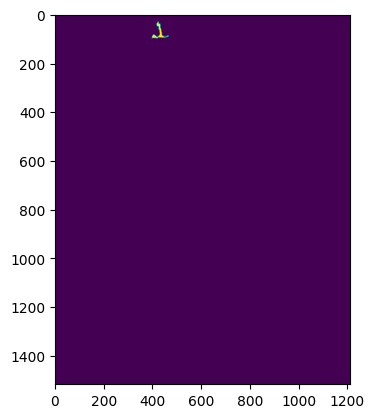

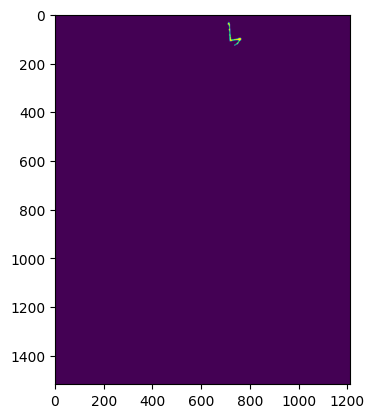

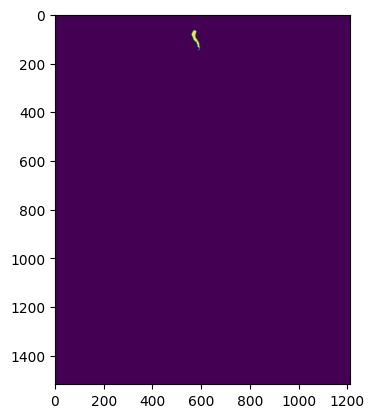

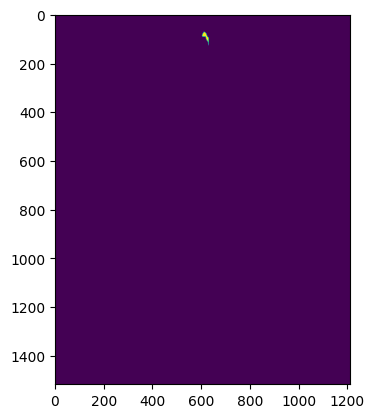

In [4]:
from skimage.morphology import reconstruction, area_opening


drawing_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)

ret, labels = cv2.connectedComponents(morph)



contours, hierarchy = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for label in range(1, 5):
    component = np.uint8(labels == label) * 255


    seed = component
    mask = morph 

    y_seed = 255  * np.ones_like(mask)

    
    filled = reconstruction(y_seed, mask, method='erosion')

    plt.imshow(component)
    plt.show()
    #component = cv2.bitwise_and(labels, label)


In [41]:
image = inv_gray_img.copy()

seed = np.copy(image)
seed[1:-1, 1:-1] = image.max()
mask = image



_, thresholded = cv2.threshold(image, 0, 150, cv2.THRESH_OTSU)

mask = cv2.morphologyEx(thresholded, cv2.MORPH_DILATE, kernel, iterations=2)


dilated = reconstruction(seed, mask, method='dilation')


plt.imshow(dilated)

ValueError: Intensity of seed image must be less than that of the mask image for reconstruction by dilation.

In [3]:
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)

def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store

#plt.imshow(thresholded)

image = gray_img

init_ls = checkerboard_level_set(image.shape, 6)


init_ls = checkerboard_level_set(image.shape, 20)

evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, num_iter=20, init_level_set=init_ls,
                             smoothing=0, iter_callback=callback)

Text(0.5, 1.0, 'Morphological ACWE segmentation')

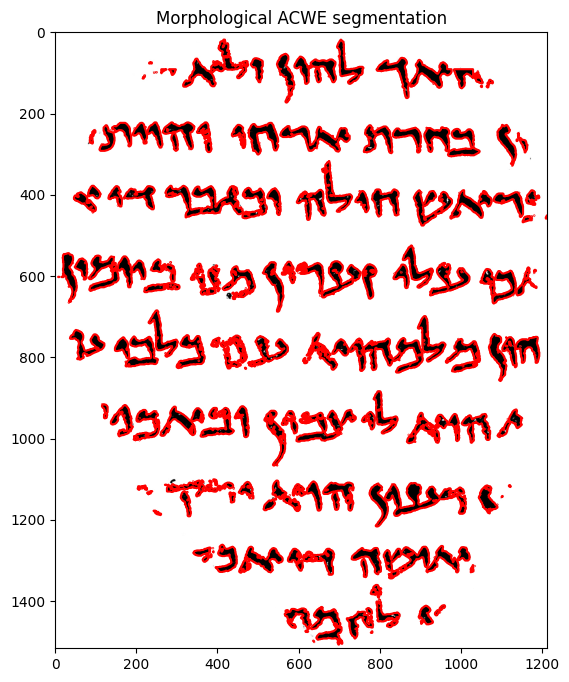

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
#ax = axes.flatten()

plt.imshow(image, cmap="gray")
#plt.axis_off()
plt.contour(ls, [0.5], colors='r')
plt.title("Morphological ACWE segmentation", fontsize=12)

In [63]:
gimage = inverse_gaussian_gradient(image)

# Initial level set
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
lsGAC = morphological_geodesic_active_contour(gimage, num_iter=230,
                                           init_level_set=init_ls,
                                           smoothing=1, balloon=-1,
                                           threshold=0.69,
                                           iter_callback=callback)



KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
#ax = axes.flatten()

plt.imshow(image, cmap="gray")
#plt.axis_off()
plt.contour(lsGAC, [0.5], colors='r')
plt.title("Morphological ACWE segmentation", fontsize=12)